In [1]:
from qutip import *
import numpy as np

In [2]:
import matplotlib.pyplot as plt
import matplotlib as mpl

plt.rcParams['text.usetex'] = True
params = {
    "backend": "ps",
    "axes.labelsize": 16,
    "font.size": 16,
    "legend.fontsize": 16,
    "xtick.labelsize": 16,
    "ytick.labelsize": 16,
    "text.usetex": True,
    "font.family": "serif",
    "font.serif": "Computer Modern Roman",
    "legend.frameon": True,
    "savefig.dpi": 100,
    "axes.linewidth": 1.5,
    'xtick.major.size' : 10,
    'xtick.major.width': 1,
    'xtick.minor.size': 7,
    'xtick.minor.width': 1,
    'ytick.major.size' : 10,
    'ytick.major.width': 1,
    'ytick.minor.size': 7,
    'ytick.minor.width': 1,
    'axes.xmargin' : 0,
    'axes.ymargin' : 0,
}
plt.rcParams.update(params)
plt.rc('text.latex', preamble=r'\usepackage{amsmath}')

In [3]:
data_transmon_stat = np.load('../../data/transmon/transmon_static_spectrum_wq=0.23.npz')
data_fluxonium_stat = np.load('../../data/fluxonium/fluxonium_static_spectrum_wq=0.15.npz')

data_transmon = np.load('../../data/transmon/transmon_floquet_spectrum_w_r=0.77.npz')
data_fluxonium = np.load('../../data/fluxonium/fluxonium_floquet_spectrum_w_r=2.92.npz')

ref_static_transmon, wr_transmon, evals_transmon, A_list_transmon, wq_transmon = data_transmon_stat['evals'], \
data_transmon['w_r'], data_transmon['evals_list'][0], data_transmon['A_list_replica'], data_transmon['wq']

ref_static_fluxonium, wr_fluxonium, evals_fluxonium, A_list_fluxonium, wq_fluxonium = data_fluxonium_stat['evals'], \
data_fluxonium['w_r'], data_fluxonium['evals_list'][0], data_fluxonium['A_list_replica'], data_fluxonium['wq']

reff_transmon = ref_static_transmon[int((np.shape(ref_static_transmon)[0]-1)/2),0]
reff_fluxonium = ref_static_fluxonium[int((np.shape(ref_static_fluxonium)[0]-1)/2),0]

ref_static_transmon = ref_static_transmon - np.min(reff_transmon)
evals_transmon = evals_transmon - np.min(reff_transmon)

ref_static_fluxonium = ref_static_fluxonium - np.min(reff_fluxonium)
evals_fluxonium = evals_fluxonium - np.min(reff_fluxonium)

In [4]:
data_transmon = np.load('../../data/transmon/transmon_single_case_A_q=0.037_w_r=0.771_w_r_disp=0.771_compensated.npz')
data_fluxonium = np.load('../../data/fluxonium/fluxonium_single_case_A_q=0.6_w_r=2.92_w_r_disp=2.92_compensated.npz')

exp_a_transmon, exp_a_an_transmon, tlist_transmon, A_Q_transmon, g_transmon, kappa_transmon, w_transmon, wq_transmon = data_transmon['exp_a'], \
data_transmon['exp_a_an'], data_transmon['tlist'], data_transmon['A_q'], data_transmon['g'], data_transmon['kappa'], data_transmon['w'], data_transmon['wq']

exp_a_fluxonium, exp_a_an_fluxonium, tlist_fluxonium, A_Q_fluxonium, g_fluxonium, kappa_fluxonium, w_fluxonium, wq_fluxonium = data_fluxonium['exp_a'], \
data_fluxonium['exp_a_an'], data_fluxonium['tlist'], data_fluxonium['A_q'], data_fluxonium['g'], data_fluxonium['kappa'], data_fluxonium['w'], data_fluxonium['wq']

In [5]:
data_transmon = np.load('../../data/transmon/transmon_SNR.npz', allow_pickle=True)

g_transmon, kappa_transmon, wq_transmon, Alist_transmon, wlist_transmon, res_an_transmon, res_num_disp_transmon, res_num_transmon=\
data_transmon['g'], data_transmon['kappa'], data_transmon['wq'], \
data_transmon['Alist'], data_transmon['wlist'], data_transmon['res_an'], data_transmon['res_num_disp'], data_transmon['res_num']

data_fluxonium = np.load('../../data/fluxonium/fluxonium_SNR.npz', allow_pickle=True)

g_fluxonium, kappa_fluxonium, wq_fluxonium, Alist_fluxonium, wlist_fluxonium, res_an_fluxonium, res_num_disp_fluxonium, res_num_fluxonium =\
data_fluxonium['g'], data_fluxonium['kappa'], data_fluxonium['wq'], \
data_fluxonium['Alist'], data_fluxonium['wlist'], data_fluxonium['res_an'], data_fluxonium['res_num_disp'], data_fluxonium['res_num']

/tmp/ipykernel_74922/3971601071.py:256: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()
/tmp/ipykernel_74922/3971601071.py:258: UserWarning: constrained_layout not applied because axes sizes collapsed to zero.  Try making figure larger or axes decorations smaller.
  fig.savefig('../figures/fig4.pdf', bbox_inches='tight')
/nobackup/my_python/lib/python3.8/site-packages/IPython/core/pylabtools.py:151: UserWarning: constrained_layout not applied because axes sizes collapsed to zero.  Try making figure larger or axes decorations smaller.
  fig.canvas.print_figure(bytes_io, **kw)


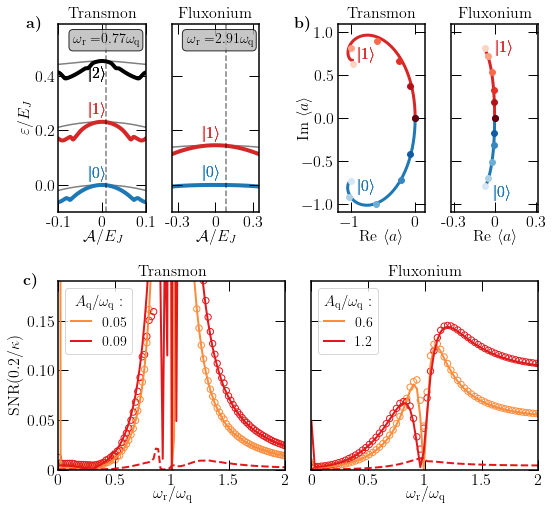

In [6]:
import matplotlib.gridspec as gridspec
import matplotlib.colors as mcolors
from matplotlib.legend_handler import HandlerTuple
from mpl_toolkits.axes_grid1.inset_locator import inset_axes

%matplotlib inline

props = dict(boxstyle='round', facecolor='#b8b8b8a6', alpha=0.8)

fig = plt.figure(figsize=(8.6,8.2), layout="constrained")

gs0 = gridspec.GridSpec(3, 6, figure=fig, height_ratios=[1,0.04,1], width_ratios=[0.5,0.5,0.00,0.00,0.5,0.5], hspace=0.24, wspace=0.45)

ax_floquet_transmon = fig.add_subplot(gs0[0,0])
ax_floquet_fluxonium = fig.add_subplot(gs0[0,1])
ax_IQ_transmon = fig.add_subplot(gs0[0,4])
ax_IQ_fluxonium = fig.add_subplot(gs0[0,5])

ax_SNR_transmon = fig.add_subplot(gs0[2,0:3])
ax_SNR_fluxonium = fig.add_subplot(gs0[2,3:6])

################### Spectrum ##################################
ax_floquet_transmon.plot(A_list_transmon, ref_static_transmon[:,0], c='black', zorder=0, alpha=0.5, ls='-')
ax_floquet_transmon.plot(A_list_transmon, ref_static_transmon[:,1], c='black', zorder=0, alpha=0.5, ls='-')
ax_floquet_transmon.plot(A_list_transmon, ref_static_transmon[:,2], c='black', zorder=0, alpha=0.5, ls='-')
ax_floquet_transmon.plot(A_list_transmon, ref_static_transmon[:,3], c='black', zorder=0, alpha=0.5, ls='-')

ax_floquet_transmon.plot(A_list_transmon, evals_transmon[:,0], zorder=1, lw=4, c='tab:blue')
ax_floquet_transmon.plot(A_list_transmon, evals_transmon[:,1], zorder=1, lw=4, c='tab:red')
ax_floquet_transmon.plot(A_list_transmon, evals_transmon[:,2], zorder=1, lw=4, c='black', alpha=1)
ax_floquet_transmon.plot(A_list_transmon, evals_transmon[:,3], zorder=1, lw=4, c='black', alpha=1)

ax_floquet_transmon.xaxis.set_tick_params(direction="in", which='both')
ax_floquet_transmon.yaxis.set_tick_params(direction="in", which='both')

ax_floquet_transmon.tick_params(top=True, bottom=True, left=True, right=True, labelleft=True,
                  labelbottom=True, labelright=False, labeltop=False, which='both')

ax_floquet_transmon.set_ylabel(r'$\varepsilon/E_J$', labelpad=2)

ax_floquet_transmon.set_xlabel(r'$\mathcal{A}/E_J$', labelpad=-1)
ax_floquet_fluxonium.set_xlabel(r'$\mathcal{A}/E_J$', labelpad=-1)

ax_floquet_fluxonium.plot(A_list_fluxonium, ref_static_fluxonium[:,0], c='black', zorder=0, alpha=0.5, ls='-')
ax_floquet_fluxonium.plot(A_list_fluxonium, evals_fluxonium[:,0], zorder=1, lw=4)

ax_floquet_fluxonium.plot(A_list_fluxonium, ref_static_fluxonium[:,1], c='black', zorder=0, alpha=0.5, ls='-')
ax_floquet_fluxonium.plot(A_list_fluxonium, evals_fluxonium[:,1], c='tab:red', zorder=1, lw=4)

ax_floquet_fluxonium.plot(A_list_fluxonium, ref_static_fluxonium[:,2], c='black', zorder=0, alpha=0.5, ls='-')
ax_floquet_fluxonium.plot(A_list_fluxonium, evals_fluxonium[:,2], c='black', zorder=1, lw=4)

ax_floquet_fluxonium.plot(A_list_fluxonium, ref_static_fluxonium[:,3], c='black', zorder=0, alpha=0.5, ls='-')
ax_floquet_fluxonium.plot(A_list_fluxonium, evals_fluxonium[:,3], c='black', zorder=1, lw=4)

ax_floquet_fluxonium.xaxis.set_tick_params(direction="in", which='both')
ax_floquet_fluxonium.yaxis.set_tick_params(direction="in", which='both')

ax_floquet_fluxonium.tick_params(top=True, bottom=True, left=True, right=True, labelleft=False,
                  labelbottom=True, labelright=False, labeltop=False, which='both')

ax_floquet_transmon.text(0.92, 0.9, r'$\omega_{\text{r}}=$'+str(np.round(wr_transmon/wq_transmon,2))+r'$\omega_{\text{q}}$', ha='right', bbox=props, \
               transform=ax_floquet_transmon.transAxes, size=14)
ax_floquet_fluxonium.text(0.92, 0.9, r'$\omega_{\text{r}}=$'+str(np.round(wr_fluxonium/wq_fluxonium,2))+r'$\omega_{\text{q}}$', ha='right', bbox=props, \
               transform=ax_floquet_fluxonium.transAxes, size=14)

ax_floquet_transmon.set_title('Transmon', fontsize=16)
ax_floquet_fluxonium.set_title('Fluxonium', fontsize=16)

ax_floquet_transmon.text(0.56,0.778,r'$\pmb{\left\vert 2 \right\rangle}$', ha='right', va='top', transform=ax_floquet_transmon.transAxes, color = 'black', \
        fontsize=16)
ax_floquet_transmon.text(0.56,0.59,r'$\pmb{\left\vert 1 \right\rangle}$', ha='right', va='top', transform=ax_floquet_transmon.transAxes, color = 'tab:red', \
        fontsize=16)
ax_floquet_transmon.text(0.56,0.25,r'$\pmb{\left\vert 0 \right\rangle}$', ha='right', va='top', transform=ax_floquet_transmon.transAxes, color = 'tab:blue', \
        fontsize=16)

ax_floquet_fluxonium.text(0.57,0.46,r'$\pmb{\left\vert 1 \right\rangle}$', ha='right', va='top', transform=ax_floquet_fluxonium.transAxes, color = 'tab:red', \
        fontsize=16)
ax_floquet_fluxonium.text(0.57,0.255,r'$\pmb{\left\vert 0 \right\rangle}$', ha='right', va='top', transform=ax_floquet_fluxonium.transAxes, color = 'tab:blue', \
        fontsize=16)

ax_floquet_transmon.axvline(x=(A_Q_transmon), ls='--', alpha=0.5, c='black')
ax_floquet_fluxonium.axvline(x=(A_Q_fluxonium), ls='--', alpha=0.5, c='black')

ax_floquet_transmon.set_ylim([-0.1,0.59])
ax_floquet_fluxonium.set_ylim([-0.1,0.59])

ax_floquet_transmon.set_xticks([-0.1,0.0,0.1],['-0.1','0','0.1'])
ax_floquet_fluxonium.set_xticks([-0.3,0.0,0.3],['-0.3','0','0.3'])

################### Single case ##################################
x_list = [0,0.5,1,2,4,8]

norm = mpl.colors.Normalize(vmin=0, vmax=len(x_list))

cmap_b = mpl.cm.ScalarMappable(norm=norm, cmap=mpl.colormaps['Blues'].reversed())
cmap_b.set_array([])

cmap_r = mpl.cm.ScalarMappable(norm=norm, cmap=mpl.colormaps['Reds'].reversed())
cmap_r.set_array([])

cmap = [cmap_b, cmap_r]

ax_IQ_transmon.plot(exp_a_an_transmon[0].real,exp_a_an_transmon[0].imag, c='tab:blue', lw=3)
ax_IQ_transmon.plot(exp_a_an_transmon[1].real,exp_a_an_transmon[1].imag, c='tab:red', lw=3)

qubit_state_list = [0,1]

dictionary = {}

for q_idx,qubit_state in enumerate(qubit_state_list):

    for index,i in enumerate(x_list):
        idx = np.where(np.abs(tlist_transmon*kappa_transmon-i)<0.01)[0][0]
        
        if q_idx == 0:
            point_blue = ax_IQ_transmon.scatter(exp_a_transmon[q_idx][idx].real, exp_a_transmon[q_idx][idx].imag, color=cmap[q_idx].to_rgba(index), s=35, zorder=10)
            dictionary[f'point_blue_{index}'] = point_blue
        else:
            point_red = ax_IQ_transmon.scatter(exp_a_transmon[q_idx][idx].real, exp_a_transmon[q_idx][idx].imag, color=cmap[q_idx].to_rgba(index), s=35, zorder=10)
            dictionary[f'point_red_{index}'] = point_red

ax_IQ_transmon.tick_params(top=True, bottom=True, left=True, right=True, labelleft=True,
                  labelbottom=True, labelright=False, labeltop=False, which='both')

ax_IQ_transmon.xaxis.set_tick_params(direction="in", which='both')
ax_IQ_transmon.yaxis.set_tick_params(direction="in", which='both')

ax_IQ_transmon.set_ylim([-1.1,1.1])
ax_IQ_transmon.set_xlim([-1.2,0.15])

#ax_IQ_transmon.set_aspect('equal')

ax_IQ_transmon.text(0.44,0.88,r'$\pmb{\left\vert 1 \right\rangle}$', ha='right', va='top', transform=ax_IQ_transmon.transAxes, color = 'tab:red', \
        fontsize=16)
ax_IQ_transmon.text(0.44,0.18,r'$\pmb{\left\vert 0 \right\rangle}$', ha='right', va='top', transform=ax_IQ_transmon.transAxes, color = 'tab:blue', \
        fontsize=16)

legend_list = []
legend_list_name = []
for iindex, ii in enumerate(x_list):
    legend_list.append((dictionary[f'point_blue_{iindex}'], dictionary[f'point_red_{iindex}']))
    if iindex == 1:
        legend_list_name.append('.5')
    else:
        legend_list_name.append(f'{ii}')


ax_IQ_fluxonium.plot(exp_a_an_fluxonium[0].real,exp_a_an_fluxonium[0].imag, c='tab:blue', lw=3)
ax_IQ_fluxonium.plot(exp_a_an_fluxonium[1].real,exp_a_an_fluxonium[1].imag, c='tab:red', lw=3)

qubit_state_list = [0,1]

dictionary = {}

for q_idx,qubit_state in enumerate(qubit_state_list):

    for index,i in enumerate(x_list):
        idx = np.where(np.abs(tlist_fluxonium*kappa_fluxonium-i)<0.01)[0][0]
        
        if q_idx == 0:
            point_blue = ax_IQ_fluxonium.scatter(exp_a_fluxonium[q_idx][idx].real, exp_a_fluxonium[q_idx][idx].imag, color=cmap[q_idx].to_rgba(index), s=35, zorder=10)
            dictionary[f'point_blue_{index}'] = point_blue
        else:
            point_red = ax_IQ_fluxonium.scatter(exp_a_fluxonium[q_idx][idx].real, exp_a_fluxonium[q_idx][idx].imag, color=cmap[q_idx].to_rgba(index), s=35, zorder=10)
            dictionary[f'point_red_{index}'] = point_red

ax_IQ_fluxonium.tick_params(top=True, bottom=True, left=True, right=True, labelleft=False,
                  labelbottom=True, labelright=False, labeltop=False, which='both')

ax_IQ_fluxonium.xaxis.set_tick_params(direction="in", which='both')
ax_IQ_fluxonium.yaxis.set_tick_params(direction="in", which='both')

ax_IQ_fluxonium.set_xticks([-0.3,0.0,0.3],['-0.3','0','0.3'])

#ax_IQ_fluxonium.set_aspect('equal')

ax_IQ_fluxonium.set_ylim([-1.1,1.1])
ax_IQ_fluxonium.set_xlim([-0.32,0.32])

ax_IQ_fluxonium.text(0.72,0.92,r'$\pmb{\left\vert 1 \right\rangle}$', ha='right', va='top', transform=ax_IQ_fluxonium.transAxes, color = 'tab:red', \
        fontsize=16)
ax_IQ_fluxonium.text(0.7,0.15,r'$\pmb{\left\vert 0 \right\rangle}$', ha='right', va='top', transform=ax_IQ_fluxonium.transAxes, color = 'tab:blue', \
        fontsize=16)

ax_IQ_transmon.set_xlabel(r'Re $\langle a \rangle$', labelpad=-1)
ax_IQ_fluxonium.set_xlabel(r'Re $\langle a \rangle$', labelpad=-1)
ax_IQ_transmon.set_ylabel(r'Im $\langle a \rangle$', labelpad=-10)

ax_IQ_transmon.set_title('Transmon', fontsize=16)
ax_IQ_fluxonium.set_title('Fluxonium', fontsize=16)

######################### SNR ####################################
cmap_plot = plt.get_cmap('YlOrRd')
norm = plt.Normalize(-2,2)
colors = cmap_plot(norm([i for i in range(len(Alist_fluxonium))]))

for idx,A in enumerate(Alist_fluxonium):
    if idx == 1 or idx == 2:
        ax_SNR_fluxonium.plot(wlist_fluxonium/wq_fluxonium, np.real(res_an_fluxonium[idx,:]), label=str(np.round(A/wq_fluxonium,2)), color=colors[idx-1], lw=2)   
        ax_SNR_fluxonium.scatter(wlist_fluxonium/wq_fluxonium, np.real(res_num_fluxonium[idx,:]), marker='o', color=colors[idx-1], facecolors='none', s=40)    
    if idx == 2:
        ax_SNR_fluxonium.plot(wlist_fluxonium/wq_fluxonium, np.real(res_num_disp_fluxonium[idx,:]), color=colors[idx-1], lw=2, ls='--')    

ax_SNR_transmon.xaxis.set_tick_params(direction="in", which='both')
ax_SNR_transmon.yaxis.set_tick_params(direction="in", which='both')
ax_SNR_transmon.set_ylabel(r'$\text{SNR}(0.2/\kappa)$')
ax_SNR_transmon.tick_params(top=True, bottom=True, left=True, right=True, labelleft=True,
                  labelbottom=True, labelright=False, labeltop=False, which='both')

ax_SNR_transmon.set_yticks([0,0.05,0.1,0.15],['0','0.05','0.10','0.15'])
ax_SNR_transmon.set_xticks([0,0.5,1,1.5,2],['0','0.5','1','1.5','2'])
ax_SNR_fluxonium.set_xticks([0,0.5,1,1.5,2],['0','0.5','1','1.5','2'])

for idx,A in enumerate(Alist_transmon):
    if idx == 1 or idx == 2:
        p1, = ax_SNR_transmon.plot(wlist_transmon/wq_transmon, np.real(res_an_transmon[idx,:]), label=str(np.round(A/wq_transmon,2)), color=colors[idx-1], lw=2)   
        ax_SNR_transmon.scatter(wlist_transmon/wq_transmon, np.real(res_num_transmon[idx,:]), marker='o', color=colors[idx-1], facecolors='none', s=40)    
    if idx == 2:
        q1, = ax_SNR_transmon.plot(wlist_transmon/wq_transmon, np.real(res_num_disp_transmon[idx,:]), color=colors[idx-1], lw=2, ls='--')    

h, l = ax_SNR_transmon.get_legend_handles_labels() # Extracting handles and labels
handles = h 
labels = l # Merging labels
leg = ax_SNR_transmon.legend(handles, labels, fontsize="14", loc='upper left', handlelength=1.4)
leg.set_title(r'$A_{\text{q}}/\omega_{\text{q}}:$',prop={'size':15})

ax_SNR_transmon.set_ylim([0,0.19])
ax_SNR_fluxonium.set_ylim([0,0.19])

ax_SNR_fluxonium.xaxis.set_tick_params(direction="in", which='both')
ax_SNR_fluxonium.yaxis.set_tick_params(direction="in", which='both')

ax_SNR_transmon.set_xlabel(r'$\omega_{\text{r}}/\omega_{\text{q}}$', labelpad=-1)
ax_SNR_fluxonium.set_xlabel(r'$\omega_{\text{r}}/\omega_{\text{q}}$', labelpad=-1)

ax_SNR_fluxonium.tick_params(top=True, bottom=True, left=True, right=True, labelleft=False,
                  labelbottom=True, labelright=False, labeltop=False, which='both')

h, l = ax_SNR_fluxonium.get_legend_handles_labels() # Extracting handles and labels
handles = h
labels = l  # Merging labels
leg = ax_SNR_fluxonium.legend(handles, labels, fontsize="14", loc='upper left', handlelength=1.4)
leg.set_title(r'$A_{\text{q}}/\omega_{\text{q}}:$',prop={'size':15})

ax_SNR_transmon.set_title('Transmon', fontsize=16)
ax_SNR_fluxonium.set_title('Fluxonium', fontsize=16)

ax_SNR_fluxonium.set_xlim([0,2])

labels = ['a)','b)','c)']
ax_floquet_transmon.text(-0.37, 0.98, r'\bf{'+labels[0]+'}', size=16, color='black', transform=ax_floquet_transmon.transAxes)
ax_IQ_transmon.text(-0.5, 0.98, r'\bf{'+labels[1]+'}', size=16, color='black', transform=ax_IQ_transmon.transAxes)
ax_SNR_transmon.text(-0.155, 0.98, r'\bf{'+labels[2]+'}', size=16, color='black', transform=ax_SNR_transmon.transAxes)

plt.tight_layout()

fig.savefig('../figures/fig4.pdf', bbox_inches='tight')